In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('images/mnist.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.shape

(42000, 785)

In [7]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34916,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


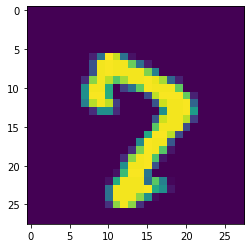

In [8]:
plt.imshow(df.iloc[34916,1:].values.reshape(28,28))

In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [13]:
X_train.shape

(33600, 784)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# in knn neighbor algorithm i just check a particular image distance from other images and 
# checking that what image is similar to this one and checking the label of images which is similar

In [20]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

17.232358932495117


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9648809523809524

In [23]:
# Now i do the same work after PCA

## PCA step

In [47]:
df = pd.read_csv('images/mnist.csv')

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
# step 1 mean center scaling
from sklearn.preprocessing import StandardScaler

In [50]:
scalar = StandardScaler()

In [51]:
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [52]:
# step 2 applying PCA
from sklearn.decomposition import PCA

In [61]:
pca = PCA(n_components=200)

In [62]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [63]:
X_train_trf.shape # So will no change in shape of features if we take n_components as None

(33600, 200)

In [64]:
knn = KNeighborsClassifier()

In [65]:
knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [66]:
y_pred = knn.predict(X_test_trf)

In [67]:
accuracy_score(y_test, y_pred)

0.9504761904761905

In [69]:
for i in range(1, 785):
    
    pca = PCA(n_components=i)
    
    X_train_trf = pca.fit_transform(X_train)
    
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf, y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test, y_pred))
    

0.2569047619047619
0.32357142857142857
0.5102380952380953
0.6664285714285715
0.7380952380952381
0.8217857142857142
0.8433333333333334
0.871547619047619
0.8861904761904762
0.9054761904761904
0.9117857142857143
0.9177380952380952
0.9279761904761905
0.9345238095238095
0.9389285714285714
0.9373809523809524
0.9397619047619048
0.9398809523809524
0.9425
0.9439285714285715
0.9434523809523809
0.9441666666666667
0.9451190476190476
0.9451190476190476
0.9471428571428572
0.9469047619047619
0.9475
0.9471428571428572
0.9497619047619048
0.9503571428571429
0.9510714285714286
0.9514285714285714
0.9495238095238095
0.9516666666666667
0.9515476190476191
0.9519047619047619
0.9525
0.9529761904761904
0.9530952380952381
0.9533333333333334
0.9516666666666667
0.9533333333333334
0.9533333333333334
0.9535714285714286
0.9535714285714286
0.9536904761904762
0.954047619047619
0.9539285714285715
0.9525
0.9532142857142857
0.9538095238095238
0.954047619047619
0.9539285714285715
0.9545238095238096
0.9542857142857143
0.953

KeyboardInterrupt: 